# Analyzing Police Violence in Canada with Python

* Firs we'll import a few standard packages

    * Numpy is the go to package for handling arrays (multidmensional data)
    * Pandas is a great tool for handling tabular datasets
    * Datetime alows us to format and interpret dates
    * matplotlib alows us to make all sort of visualizatons
            * %matplotlib notebook allows us to make our visualizations interactive
            
## This dataset comes from the CBC:
https://newsinteractives.cbc.ca/longform-custom/deadly-force


## Learning Objectives (Geocoding Police Violence):
* Get and introduction using open source GIS (Python) 
* Import, Join, and Plot tabular data
* Geocode addresses
* Query records
* Produce a web map



In [1]:
import geopy
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib notebook
# import datetime as dt
# import geopandas as gpd
# from pip._internal.operations.freeze import freeze
# for requirement in freeze(local_only=True):
#     print(requirement)

ModuleNotFoundError: No module named 'geopy'

## Lets look at the incident records

* We'll use a Pandas to import the data.  Pandas stores records as a DataFrame

### This data set includes some information about each police killing

* We have the postal code of the incident, province, municipality, along with the date and incident ID
* Pandas has all sorts of helpful funcitons, including parse_dates, which will automattially interpret date columns
* Calling the DataFrame will give us a quick look at the dataset

In [3]:
Incident = pd.read_csv('incident.csv',delimiter = ',',header = 0,parse_dates=['date'],index_col='id_incident')
Incident


,date,day_week,prov,city_town,postal_code,location_type
id_incident,,,,,,
1,2012-01-06,Fri,QC,Montreal,H3B 4W5,Urban
2,2012-01-11,Wed,AB,Onoway,T0E 1V0,Rural
3,2012-01-12,Thu,ON,Oakville,L6H 0G6,Urban
4,2012-02-03,Fri,ON,Toronto,M4C 1X5,Urban
5,2012-02-13,Mon,ON,Hamilton,L8K 5J4,Urban
...,...,...,...,...,...,...
500,2011-03-27,Sun,QC,Terrebonne,J6W 1H3,Urban
501,2010-10-21,Thu,QC,Cloutier,J0Z 1S0,Rural
502,2007-04-25,Wed,QC,Matagami,J0Y 2A0,Rural


## We also have data on the Victims and Police

* Notice the names have been redacted, this to to protect the privacy of the victims

* Calling .head() will print the first four rows and show us the column headers.

In [4]:
Victim = pd.read_csv('victim.csv',delimiter = ',',header = 0, index_col=['id_incident'])
Police = pd.read_csv('police.csv',delimiter = ',',header = 0, index_col=['id_incident'])
print(Victim.head())
# print()
print(Police.head())

            id_victim   Name   age gender       race ethnic_ancestry  \
id_incident                                                            
1             0001-V1  *****  34.0   Male      Other            Iran   
2             0002-V1  *****  49.0   Male    Unknown             NaN   
3             0003-V1  *****  43.0   Male  Caucasian             NaN   
4             0004-V1  *****  29.0   Male      Black             NaN   
5             0005-V1  *****  27.0   Male      Asian            Laos   

            immigrant_refugee_naturalized  \
id_incident                                 
1                                     Yes   
2                                 Unknown   
3                                 Unknown   
4                                 Unknown   
5                                     Yes   

                                        armed_type cause_death taser_deployed  \
id_incident                                                                     
1            Knif

# We can join all our data into one
* The id_incident is a unique identifier shared between each file, it can be used to match up records
* Then we can reset the index to the date of the indicent

## Therer are some duplicated values in the police record, I'll have to investigate further before including that.

In [5]:
AllData = Incident.join(Victim).reset_index().set_index('date',drop = False)
AllData

,id_incident,date,day_week,prov,city_town,postal_code,location_type,id_victim,Name,age,...,ethnic_ancestry,immigrant_refugee_naturalized,armed_type,cause_death,taser_deployed,injured_officer,excited_delirium,mentral_distress_disorder,substance_abuse,summary
date,,,,,,,,,,,,,,,,,,,,,
2012-01-06,1,2012-01-06,Fri,QC,Montreal,H3B 4W5,Urban,0001-V1,*****,34.0,...,Iran,Yes,"Knife, axe, other cutting instruments",Gunshot,No,Yes,No,Yes,Yes,Farshad Mohammadi was carrying a knife when he...
2012-01-11,2,2012-01-11,Wed,AB,Onoway,T0E 1V0,Rural,0002-V1,*****,49.0,...,NaN,Unknown,"Knife, axe, other cutting instruments",Gunshot,No,No,No,Unknown,Yes,RCMP called to an apartment complex in respons...
2012-01-12,3,2012-01-12,Thu,ON,Oakville,L6H 0G6,Urban,0003-V1,*****,43.0,...,NaN,Unknown,"Knife, axe, other cutting instruments",Gunshot,No,No,No,Unknown,Unknown,Kyle Newman intentionally and repeatedly struc...
2012-02-03,4,2012-02-03,Fri,ON,Toronto,M4C 1X5,Urban,0004-V1,*****,29.0,...,NaN,Unknown,"Knife, axe, other cutting instruments",Gunshot,No,No,No,Yes,No,"Michael Eligon, who had been involuntarily com..."
2012-02-13,5,2012-02-13,Mon,ON,Hamilton,L8K 5J4,Urban,0005-V1,*****,27.0,...,Laos,Yes,Vehicle,Gunshot,No,No,No,Yes,Unknown,"Police had a stolen van under surveillance, an..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-03-27,500,2011-03-27,Sun,QC,Terrebonne,J6W 1H3,Urban,0500-V1,*****,49.0,...,NaN,Unknown,Vehicle,Gunshot,No,Yes,No,No,No,Police responding to a robbery call at a gas s...
2010-10-21,501,2010-10-21,Thu,QC,Cloutier,J0Z 1S0,Rural,0501-V1,*****,34.0,...,NaN,No,"Knife, axe, other cutting instruments",Gunshot,No,No,No,Yes,Yes,√âric Pag√© had experienced a head injury at w...
2007-04-25,502,2007-04-25,Wed,QC,Matagami,J0Y 2A0,Rural,0502-V1,*****,43.0,...,NaN,Yes,"Knife, axe, other cutting instruments",Gunshot,No,No,No,Yes,No,Oumar Thiam moved to Quebec from Senegal with ...


## Lets look at a few specifics

* Pandas alows us to quickly calculate statiscis like averages.

* It also has special funcitons
    * .groupby() allows us to aggreagate data by different columns
    * .resample() alows us to up or downsample to by a specific interval (e.g. Yearly) 
* We can use matplotlib.pyplot (plt) to display our information

Mean Victim Age:  36.73186813186813



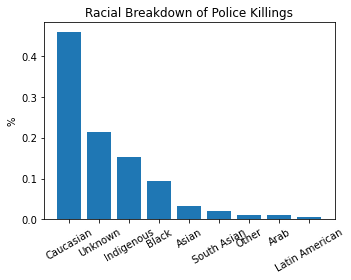

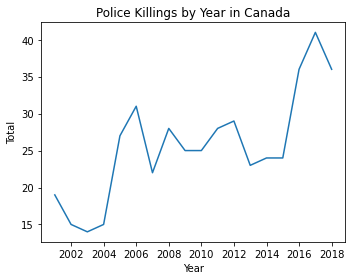

In [6]:
print('Mean Victim Age: ', AllData['age'].mean())
print()

Count = AllData.groupby('race')['Name'].count()
Percentage =(Count/Count.sum()).sort_values(ascending=False)
plt.figure(figsize=(5,4))
plt.bar(Percentage.index,Percentage.values)
plt.title('Racial Breakdown of Police Killings')
plt.ylabel('%')
plt.xticks(rotation=30)
plt.tight_layout()

# for a in Police.duplicated():
#     if a == True:
#         print(a)

Yearly = AllData.resample('Y').count()
plt.figure(figsize=(5,4))
plt.plot(Yearly.index,Yearly['postal_code'])
plt.title('Police Killings by Year in Canada')
plt.xlabel('Year')
plt.ylabel('Total')
plt.tight_layout()

## Lets use Geocoding to assign coordinates to the addresses

* Geocoding is a method of getting the x,y (latitude and longitude) coordinates for an entity based on a text description.

* We'll use the geopy package for this.  Check the docs if you're intersted in learning more:
https://geopy.readthedocs.io/en/stable/
    * Geocoding is a method for turning text descriptors into coordinates
    * geopy has multiple geocoder options.  You can use googel, bing, open streetmaps, etc.
    * We'll used Mapbox becsue you can get up to 15,000 free geocodes per month!
        * Mapbox is a webmapping platform that alows you to create and host webmaps
        * First, create an acount: https://www.mapbox.com/
        * Then you can get an API key for geocoding: https://account.mapbox.com/access-tokens/

### Once we have this we can import the MapBox geocoder and give it our API key 
* Then we can get to work!

### We'll use another pacakge called Follium to quickly plot our data on a zoomable webmap!

In [8]:
from geopy.geocoders import MapBox
import folium
geolocator = MapBox(api_key="pk.eyJ1IjoianVuZXNwYWNlYm9vdHMiLCJhIjoiY2ticGpkbXUxMHZyeTJzbDNpMGpjNWM5biJ9.B3AUQA9Qff8fo7gAo6NTvw")

# Lets try a simple example first!  Type your address here and see what comes up!
Home = geolocator.geocode('2710 Fraser St. Vancouver, BC')
print(Home.latitude,Home.longitude)

TestMap = folium.Map(
    location=[Home.latitude,Home.longitude],
    zoom_start=11,
    tiles='Stamen Terrain'
)
folium.CircleMarker(
        location=[Home.latitude,Home.longitude],
        radius=10,
        popup='Home!',
        fill_opacity = 1,
        fill=True,
        color='black',
        line_weight=.35,
        fill_color='blue'
    ).add_to(TestMap)
TestMap

49.260438 -123.088896


### Lets explore this a bit further.

* Geocoding requires specific information, otherwise, you may "confuse" the service

* e.g. If you want to search london, make sure you know which london you are talking about.  Specificity is key here

In [9]:
TestMap2 = folium.Map(
    location=[45,-30],
    zoom_start=3,
    tiles='Stamen Terrain'
)
London = geolocator.geocode('London')
print(London)
folium.CircleMarker(
        location=[London.latitude,London.longitude],
        radius=10,
        popup='London',
        fill_opacity = 1,
        fill=True,
        color='black',
        line_weight=.35,
        fill_color='red'
    ).add_to(TestMap2)
also_London = geolocator.geocode('London, On')
print(also_London)
folium.CircleMarker(
        location=[also_London.latitude,also_London.longitude],
        radius=10,
        popup='Also London!',
        fill_opacity = 1,
        fill=True,
        color='black',
        line_weight=.35,
        fill_color='green'
    ).add_to(TestMap2)
TestMap2

London, Greater London, England, United Kingdom
London, Ontario, Canada


## This data set has zipcodes
* This is a very specific identifier, so its all we need!

* Lets map all of the police killings by ethnicity

* This will take a little while, we have to query each of the records

* Some of our requests may fail! So we can try again with the city and province if so.
    * Try statements allow us to test if something works and skip the error if it doesn't.
    * If the city/province request fails, we'll leave it blank and say the geocoding failed

In [10]:
# # location = geolocator.geocode(Incident.iloc[1])
color_Scheme = {
    'Caucasian':'red',
    'Unknown':'grey',
    'Indigenous':'blue',
    'Black':'green',
    'Asian':'orange',
    'South Asian':'purple',
    'Other':'teal',
    'Arab':'pink',
    'Latin American':'yellow',
}
CanadaMap = folium.Map(
    location=[55,-91.5],
    zoom_start=4,
    tiles='Stamen Terrain'
)
AllData['latitude'] = np.nan
AllData['longitude'] = np.nan
AllData['geocoding_Notes'] = ''
# i = 1
# for postal_code,race in zip(AllData['postal_code'],AllData['race']):
success = True
for index, row in AllData.iterrows():
#     if i <3:
    try:
        g = geolocator.geocode(row['city_town']+' '+row['postal_code']+' '+ row['prov'])
        AllData.loc[AllData['postal_code']==row['postal_code'],
                    ['latitude','longitude']]=g.latitude,g.longitude
    except:
        try:
            g = geolocator.geocode(row['city_town']+' '+row['prov'])
            AllData.loc[AllData['postal_code']==row['postal_code'],
                        ['latitude','longitude','geocoding_Notes']]=g.latitude,g.longitude,'Just City'
            
        except:
            AllData.loc[AllData['postal_code']==row['postal_code'],
                        'geocoding_Notes']='Geocoding Failed'
            success = False
            pass
        pass
            
    if success == True:
        folium.CircleMarker(
            location=[g.latitude,g.longitude],
            radius=10,
            popup=row['race']+' '+ row['gender'] + ' '+ str(row['age']),
            fill_opacity = 1,
            fill=True,
            color='black',
            line_weight=.35,
            fill_color=color_Scheme[row['race']]
        ).add_to(CanadaMap)
    success = True
#     i +=1
CanadaMap
#         AllData.loc[AllData['postal_code']==postal_code,'longitude']=g.longitude
#         AllData.iloc[i]['longigude']=g.longitude
#         print(AllData.iloc[i]['latitude'])

# One of the records shows up in Massachusets.  This is obviously and issue.  Lets investigate a bit to try and see why?

* Its a typo.  Search this zipcode on the canada post webpage:https://www.canadapost.ca/cpo/mc/personal/postalcode/fpc.jsf
* It doesn't exist.  Say maybe its: V1T 7A3 instead?

In [11]:
# AllData.loc[(AllData['race'] == 'V1T 7Z3'),'postal_code'] = 'V1T 7A3'
g = geolocator.geocode('V1T 7A3')
AllData.loc[AllData['postal_code']=='V1T 7Z3',
                    ['postal_code','latitude','longitude']]='V1T 7A3',g.latitude,g.longitude

# print(AllData.loc[((AllData['print(AllData.loc[((AllData['race'] == 'Indigenous')&(AllData['gender'] == 'Male')&(AllData['age'] == 35)
#                   ),['postal_code','city_town','prov']])'] == 'Indigenous')&(AllData['gender'] == 'Male')&(AllData['age'] == 35)
#                   ),['postal_code','city_town','prov']])

# Lets save our data so we don't have to geocode it everytime

In [12]:
AllData.to_csv('PoliceKillings.csv')

# Introduction using open source GIS (Python/QGIS) 
* Bulding off what was done in the last workshop
* Attendance of the first workshop isn't a pre-requisite of this one
* But the "output" of the first is the input of the second

# Learning Objectives:

* Import, Parse, and Plot tabular data
* Join Tabular & Spatial Data
* Reproject Coordinate Systems
* Data Normalization w/ Census Data
* Create an Infographic
* Create a heatmap (Maybe, if time allows??)

### GIS w/ Python: Resources:

https://gis.stackexchange.com/

https://geopandas.org/

https://matplotlib.org/


## First, Lets work with geopandas

* Geopandas is a geospatial exentson for pandas

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# We import the Police Killings file we geocoded in Workshop #1
AllData= pd.read_csv('PoliceKillings.csv',parse_dates=['date'])
# We can then convert teh pandas dataframe into a geopandas "GeodataFrame"
police_Killings = gpd.GeoDataFrame(
    AllData,
    geometry=gpd.points_from_xy(AllData.longitude, AllData.latitude)
)
# We have to assign a coordinate system information associated with these lattitude/longigute coordinate
# epsg:4326 is a code for the WGS 1984 Datum, the coordinate system used by Mapbox's geodocer
police_Killings.crs = {'init' :'epsg:4326'}
police_Killings.head()

,date,id_incident,date.1,day_week,prov,city_town,postal_code,location_type,id_victim,Name,...,taser_deployed,injured_officer,excited_delirium,mentral_distress_disorder,substance_abuse,summary,latitude,longitude,geocoding_Notes,geometry
0,2012-01-06,1,2012-01-06,Fri,QC,Montreal,H3B 4W5,Urban,0001-V1,*****,...,No,Yes,No,Yes,Yes,Farshad Mohammadi was carrying a knife when he...,45.498173,-73.567157,NaN,POINT (-73.56716 45.49817)
1,2012-01-11,2,2012-01-11,Wed,AB,Onoway,T0E 1V0,Rural,0002-V1,*****,...,No,No,No,Unknown,Yes,RCMP called to an apartment complex in respons...,53.688760,-114.199440,NaN,POINT (-114.19944 53.68876)
2,2012-01-12,3,2012-01-12,Thu,ON,Oakville,L6H 0G6,Urban,0003-V1,*****,...,No,No,No,Unknown,Unknown,Kyle Newman intentionally and repeatedly struc...,43.477098,-79.702193,NaN,POINT (-79.70219 43.47710)
3,2012-02-03,4,2012-02-03,Fri,ON,Toronto,M4C 1X5,Urban,0004-V1,*****,...,No,No,No,Yes,No,"Michael Eligon, who had been involuntarily com...",43.687560,-79.321000,NaN,POINT (-79.32100 43.68756)
4,2012-02-13,5,2012-02-13,Mon,ON,Hamilton,L8K 5J4,Urban,0005-V1,*****,...,No,No,No,Yes,Unknown,"Police had a stolen van under surveillance, an...",43.219570,-79.794930,NaN,POINT (-79.79493 43.21957)


## Now we can import the provincial boundaries.

* They are in "Shapefile" format
* Note the layer has a different CRS
* Canadian Census Data usees the Lambert Conformal Conic Projection
    * This projectoin is ideally suited for displaying the entire country

In [3]:
# Now we can import a shapefile of Canadian Provincial boundaries!
Provinces = gpd.read_file('lpr_000b16a_e.shp')
print(Provinces.crs)

epsg:3347


## Layers need to be in the same coordinate system to match up properly!

* We can re-project the police_Killings layer using the .to_crs function to set the CRS to that of the Provinces
* Then we can make a map!

epsg:3347


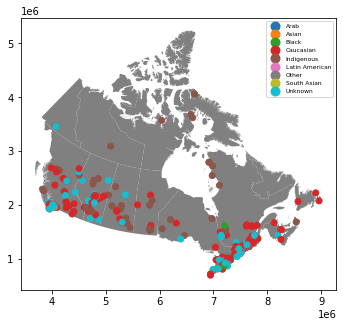

In [4]:
Canada = gpd.read_file('lpr_000b16a_e.shp')
print(Canada.crs)
police_Killings = police_Killings.to_crs(Provinces.crs)

fig,ax=plt.subplots(figsize=(6,5))
Canada.plot(ax=ax,color='grey')
police_Killings.plot(ax=ax,column='race',legend=True,legend_kwds={'loc': 'upper right','fontsize':6})

## Obvioulsly, there are more killings where there are more people.

### But does that tell the whole story?  No!

* Ontariao is the most populous province (14.5 million), and it has the most
* Quebec is the second most populous (8.5 million), yet BC (5 million) has more killings!?

In [5]:
print(police_Killings.groupby('prov').count()['date'].sort_values())

prov
NT      1
YT      2
NL      3
NS      3
NB      4
NU      5
SK     17
MB     19
AB     71
QC     87
BC     98
ON    152
Name: date, dtype: int64


# To really know what's going on, we need to Normalize our data

* Lets import a tabular dataset of provincial level census information
* We have the total population, and the racial breakdown.

In [6]:
Census = pd.read_csv('Census.csv',index_col=[0])
Census.head()

,Total,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Asian,Caucasian
PRUID,,,,,,,,,,,,,,,,
1,35151728,1924635,1577060,1198545,780125,447320,523235,313260,264305,188710,92920,132090,232375,1673780,2952075,25803368
10,519716,2645,2325,2350,1385,635,1375,335,220,75,60,145,255,45725,4180,462186
11,142907,925,2570,825,670,255,585,145,215,210,110,50,85,2735,3705,133527
12,923598,7905,8645,21910,3400,1685,8115,1195,1540,1540,695,635,1390,51490,15475,813453
13,747101,2535,3925,6995,1975,1285,2960,1230,735,1685,230,300,680,29380,9045,693186


## We can join this data set to the provincial shapefile!

* PRUID is a "unique identifier" that represents the provinces.  We can use it as the join key.

In [7]:
Test_Join = Provinces.set_index('PRUID').join(Census)
Test_Join.head()

,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,AREA_LCC,AREA_AEA,Area_Merc,geometry,Total,...,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Asian,Caucasian
PRUID,,,,,,,,,,,,,,,,,,,,,
10,Newfoundland and Labrador,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,397598.0,406998.00,1124050.0,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Prince Edward Island,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,6023.0,5893.29,12384.0,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Nova Scotia,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,57534.5,55643.30,111891.0,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,New Brunswic,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,74525.4,73050.60,154848.0,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Quebec,Quebec,Québec,Que.,Qc,1476350.0,1509750.00,4309780.0,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# But our join fails!

### Why?  Lets look at the join keys from both files?  Maybe we have a datatype missmatch?

In [8]:
print(Provinces['PRUID'])
print(Census.index)


0     10
1     11
2     12
3     13
4     24
5     35
6     46
7     47
8     48
9     59
10    60
11    61
12    62
Name: PRUID, dtype: object
Int64Index([1, 10, 11, 12, 13, 24, 35, 46, 47, 48, 59, 60, 61, 62], dtype='int64', name='PRUID')


## Sure enough!  The provinces PRUID is an "object", not an integer.

* We can fix that easily and then do the join!
    * Just type 'int64' in .astype() so it matches with the other layer!

In [9]:
Provinces['PRUID'] = Provinces['PRUID'].astype('int64')
Provinces_Join = Provinces.set_index('PRUID').join(Census)
Provinces_Join.head()

,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,AREA_LCC,AREA_AEA,Area_Merc,geometry,Total,...,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Asian,Caucasian
PRUID,,,,,,,,,,,,,,,,,,,,,
10,Newfoundland and Labrador,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,397598.0,406998.00,1124050.0,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",519716,...,1375,335,220,75,60,145,255,45725,4180,462186
11,Prince Edward Island,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,6023.0,5893.29,12384.0,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",142907,...,585,145,215,210,110,50,85,2735,3705,133527
12,Nova Scotia,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,57534.5,55643.30,111891.0,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",923598,...,8115,1195,1540,1540,695,635,1390,51490,15475,813453
13,New Brunswic,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,74525.4,73050.60,154848.0,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",747101,...,2960,1230,735,1685,230,300,680,29380,9045,693186
24,Quebec,Quebec,Québec,Que.,Qc,1476350.0,1509750.00,4309780.0,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",8164361,...,213740,62825,32405,8055,4575,9840,23040,182890,209870,6949091


## Now we  want to normalize the number of killings by population to get a rate

* We have a few more steps to go through first.
    * The police killings and census data use different abbreviations.  To do a join our dataset with the census data we'll need to assign an new abbreviaton
    * We'll us a dictionary to do this
* Then we can summarize the killings by province and join it to the Provinces_Join layer

In [10]:
# Temp['Rate'] = Temp['date']/Temp['Total']*1e4
# Temp = Temp.sort_values(by='Rate')

abr_dict = {'AB':'Alta.',
            'BC':'B.C.',
            'MB':'Man.',
            'NB':'N.B.',
            'NL':'N.L.',
            'NS':'N.S.',
            'NT':'N.W.T.',
            'NU':'Nvt.',
            'ON':'Ont.',
            'PE':'P.E.I.',
            'QC':'Que.',
            'SK':'Sask.',
            'YT':'Y.T.'
           }

police_Killings['PREABBR']=''
for prov in police_Killings.prov.unique():
    police_Killings.loc[police_Killings['prov']==prov,'PREABBR']=abr_dict[prov]

## Now we can summarize the killings by province and join it to the Provinces_Join layer
* Note Prince Edward Island doesn't have any.

In [11]:
# Joined = Canada.join(police_Killings)
Provinces_Killings=Provinces_Join.set_index('PREABBR').join(police_Killings.groupby('PREABBR').count()['id_victim'])
Provinces_Killings['id_victim']

PREABBR
N.L.        3.0
P.E.I.      NaN
N.S.        3.0
N.B.        4.0
Que.       87.0
Ont.      152.0
Man.       19.0
Sask.      17.0
Alta.      71.0
B.C.       98.0
Y.T.        2.0
N.W.T.      1.0
Nvt.        5.0
Name: id_victim, dtype: float64

### We can fix this easily using the .fillna() function

### The we can do the normalization!!

* We'll calculat the rate of police killings per ... ten thousand?
    * Divide the number of killings, by the total population.  To get the per person rate
    * Then multiply by 1 million
    * Then sort the values
    
* Then we'll plot it on a map, with a bar graph below for extra context!

KeyError: 'West Asian'

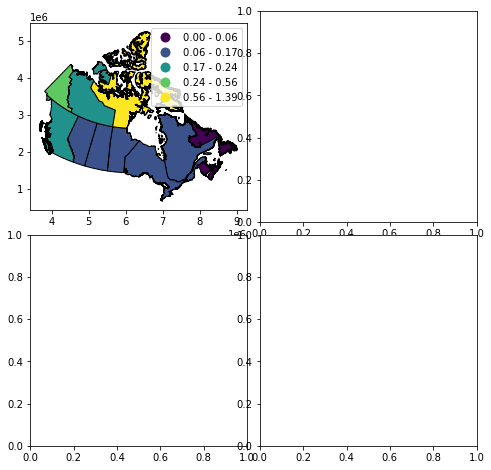

In [34]:


fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(6,6)
ax1 = fig.add_subplot(gs[0:3, :3])
ax2 = fig.add_subplot(gs[0:3, 3:])
ax3 = fig.add_subplot(gs[3:, :3])
ax4 = fig.add_subplot(gs[3:, 3:])
Provinces_Killings['Indigenous_pct'] = Provinces_Killings['Indigenous']/Provinces_Killings['Total']
Provinces_Killings['Black_pct'] = Provinces_Killings['Black']/Provinces_Killings['Total']

Provinces_Killings.plot(ax=ax1,column='Rate',edgecolor='k',legend=True,scheme='natural_breaks')
# ax3.bar(Provinces_Killings.index,Provinces_Killings['Rate'])
# ax3.set_xticklabels(Provinces_Killings.index,rotation=30)
Total = police_Killings.groupby('race').count()
Rate = []
Races = ['Black','Indigenous','Caucasian','Asian','West Asian']
for race in Races:
    Rate.append((Total['date'].T[race]/Provinces_Killings[race]).values[0]*1e6/17)
Normalized_Rates = pd.DataFrame(index=Races,data={'Rate':Rate})
ax4.bar(Normalized_Rates.index,Normalized_Rates.Rate,edgecolor='k')
ax4.set_title('Police Killing Rates in BC')
ax4.set_ylabel('Killings/Year/Million Residents')
Provinces_Killings.plot(ax=ax3,column='Indigenous_pct',edgecolor='k',legend=True,scheme='natural_breaks')
Provinces_Killings.plot(ax=ax2,column='Black_pct',edgecolor='k',legend=True,scheme='natural_breaks')
plt.suptitle('Police Killing Rates Across Canada')

race
Arab                5
Black              43
Caucasian         212
East Asian         15
Indigenous         70
Latin American      3
Other               5
South Asian        10
Unknown            99
Name: date, dtype: int64
Mixed           0.232380
West Asian      0.264315
Arab            0.523235
Black           1.198545
Indigenous      1.673780
South Asian     1.924640
East Asian      2.952065
Caucasian      25.803358
dtype: float64


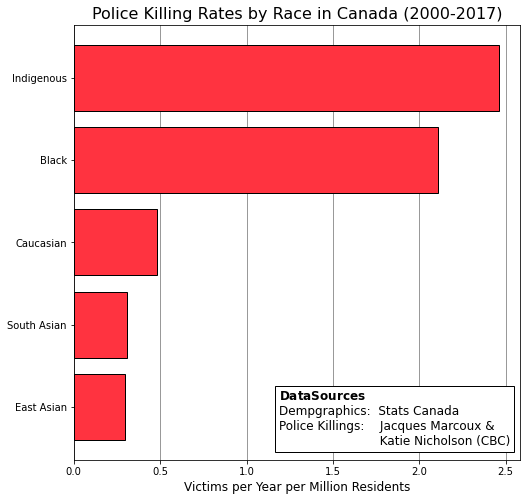

In [111]:
Provinces_Killings['East Asian']=Provinces_Killings['Asian']
police_Killings.loc[police_Killings['race']=='Asian','race']='East Asian'
Total = police_Killings.groupby('race').count()
# print(policde_killings)
print(Total['date'].T)
Rate = []


# Races = ['Black','Indigenous','Caucasian','East Asian','South Asian']

Races = ['East Asian','South Asian','Caucasian','Black','Indigenous']
for race in Races:
    Rate.append((Total['date'].T[race]/Provinces_Killings[race].sum())*1e6/17)
#     print(Total['date'].T[race])#,Provinces_Killings[race])
Normalized_Rates = pd.DataFrame(index=Races,data={'Rate':Rate})
fig,ax=plt.subplots(figsize = (8,8))
ax.barh(Normalized_Rates.index,Normalized_Rates.Rate,edgecolor='k',color=[1,.2,.25],linewidth = 1)
ax.set_title("Police Killing Rates by Race in Canada (2000-2017)",fontsize = 16)
ax.set_xlabel('Victims per Year per Million Residents',fontsize=12)
ax.grid(axis='x',color='grey')
ax.set_axisbelow(True)
textstr = '$\\bf{Data Sources}$\nDempgraphics:  Stats Canada\nPolice Killings:    Jacques Marcoux &\n'+\
'                          Katie Nicholson (CBC)'
props = dict(facecolor='white')#, alpha=0.75)
ax.text(0.46, 0.16, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

plt.savefig('Rates.png',dpi=400)
print(Provinces_Killings[['Black','Indigenous','Caucasian','East Asian','South Asian','Arab','West Asian','Mixed']].sum().sort_values()/1e6)

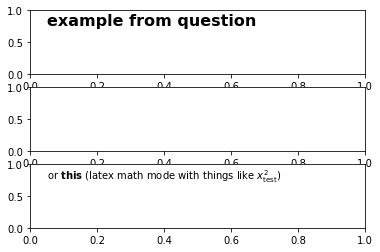

In [95]:

fig, axs = plt.subplots(3, 1)
ax0, ax1, ax2 = axs

ax0.text(0.05, 0.95, 'example from question',
        transform=ax0.transAxes, fontsize=16, fontweight='bold', va='top')
# ax1.text(0.05, 0.8, 'you can try \\textbf{this} using \\LaTeX', usetex=True,
#         transform=ax1.transAxes, fontsize=16, va='top')
ax2.text(0.05, 0.95,
         'or $\\bf{this}$ (latex math mode with things like '
         '$x_\mathrm{test}^2$)',
        transform=ax2.transAxes, fontsize=10, va='top')

plt.show()

### Nunavut obviously has a serious problem.  75% of its population is Inuit & its rate is an order of magnitude higher than the other provinces or teritories.

### BC is the worst to of the provinces.  Lets select BC and investigate further.

* For We can select BC using the PREABBR value.
* We'll also re-project into UTM Zone 10 N, this is a more accurate coordinate system for this region

* Then we can look at the racial breakdown of killings in BC using the .groupby function again.
    * We'll create a new dataframe normalizing total killings for different races by total population within those groups
    * Then we can make a barplot highlighting racial biases 


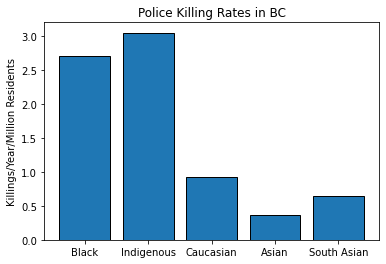

In [24]:
# 26910
BC = Provinces_Killings.loc[Provinces_Killings.index=='B.C.'].to_crs(26910)
BC_Killings = police_Killings.loc[police_Killings['PREABBR']=='B.C.'].to_crs(26910)
Total_BC = BC_Killings.groupby('race').count()

Rate = []
Races = ['Black','Indigenous','Caucasian','Asian','South Asian']
for race in Races:
    Rate.append((Total_BC['date'].T[race]/BC[race]).values[0]*1e6/17)
Normalized_Rates = pd.DataFrame(index=Races,data={'Rate':Rate})
plt.figure()
plt.bar(Normalized_Rates.index,Normalized_Rates.Rate,edgecolor='k')
plt.title('Police Killing Rates in BC')
plt.ylabel('Killings/Year/Million Residents')
plt.savefig('BCPoliceKillings.png')
# print(Total_BC['Black']/BC['Black'])

# fig,ax=plt.subplots(figsize=(6,6))

# BC.plot(ax=ax,color='grey',edgecolor='k')
# BC_Killings.plot(ax=ax,column='race',legend=True)
# print(Canada.head())

# from fiona.crs import from_epsg
# from_epsg(2193)
# # Proj({'init': 'epsg:2193', 'no_defs': True}, preserve_flags=True)

## Are there any temporal trends?

* Things certainly aren't gettng any better.

<BarContainer object of 18 artists>

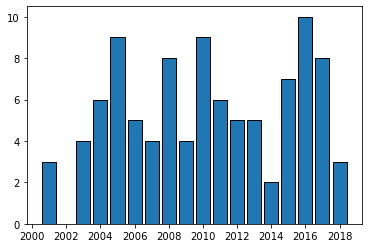

In [25]:
plt.figure()
BC_Year = BC_Killings.set_index('date').resample('Y').count()
plt.bar(BC_Year.index,BC_Year.race,width=300,edgecolor='k')

## Lets make an infographic for BC, summarizing some of the key points

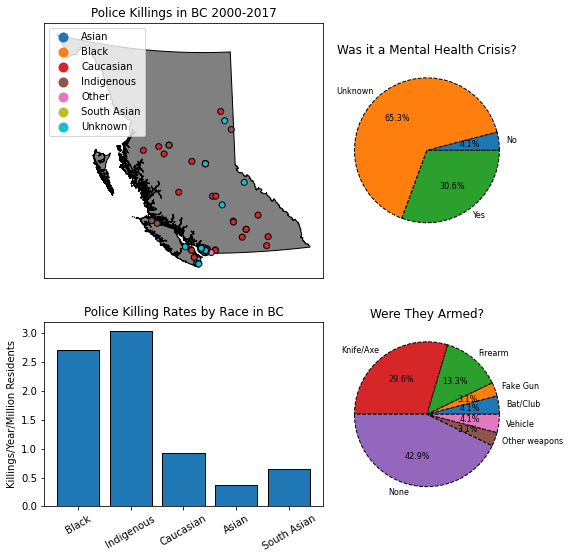

In [26]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(10,10)
ax0 = fig.add_subplot(gs[0:6, 0:6])
BC.plot(ax=ax0,color='grey',edgecolor='k')
BC_Killings.plot(ax=ax0,column='race',legend=True,edgecolor='k')
ax0.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)
ax0.set_title('Police Killings in BC 2000-2017')


ax1 = fig.add_subplot(gs[1:5, 6:])

Mental_Health = BC_Killings.groupby('mentral_distress_disorder').count()
ax1.pie(Mental_Health['id_victim'],labels=Mental_Health.index,textprops={'fontsize': 8},
        autopct='%1.1f%%',wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'})
ax1.set_title('Was it a Mental Health Crisis?')
# ax1.bar(BC_Year.index,BC_Year.race,width=300,edgecolor='k')
# ax1.set_title('Police Killings by Year in BC')
# ax1.set_ylabel('Number')

ax2 = fig.add_subplot(gs[6:, 0:6])
ax2.bar(Normalized_Rates.index,Normalized_Rates.Rate,edgecolor='k')
ax2.set_title('Police Killing Rates by Race in BC')
ax2.set_ylabel('Killings/Year/Million Residents')
ax2.set_xticklabels(Normalized_Rates.index,rotation=30)

BC_Killings.loc[BC_Killings.armed_type=='Knife, axe, other cutting instruments','armed_type']='Knife/Axe'
BC_Killings.loc[BC_Killings.armed_type=='Bat, club, other swinging object','armed_type']='Bat/Club'
BC_Killings.loc[BC_Killings.armed_type=='Air gun, replica gun','armed_type']='Fake Gun'
BC_Killings.loc[BC_Killings.armed_type=='Unknown','armed_type']='None'
Mental_Health = BC_Killings.groupby('armed_type').count()
ax3 = fig.add_subplot(gs[6:, 6:])
ax3.pie(Mental_Health['id_victim'],labels=Mental_Health.index,textprops={'fontsize': 8},
        autopct='%1.1f%%',wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'})
ax3.set_title('Were They Armed?')


plt.tight_layout()
# ax0 = fig.add_subplot(gs[0:6, 0:6])

In [218]:

police_Killings.groupby('armed_type').count()
# Canada['PREABBR']
# Joined = Canada.join(police_Killings)

,date,day_week,prov,city_town,postal_code,location_type,id_victim,Name,age,gender,...,injured_officer,excited_delirium,mentral_distress_disorder,substance_abuse,summary,latitude,longitude,geocoding_Notes,geometry,PREABBR
armed_type,,,,,,,,,,,,,,,,,,,,,
"Air gun, replica gun",27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,0,27,27
"Bat, club, other swinging object",20,20,20,20,20,20,20,20,19,20,...,20,20,20,20,20,20,20,0,20,20
Firearm,88,88,88,88,88,88,88,88,87,88,...,88,88,88,88,88,86,86,2,88,88
"Knife, axe, other cutting instruments",153,153,153,153,153,153,153,153,151,153,...,153,153,153,153,153,153,153,0,153,153
None,116,116,116,116,116,116,116,116,115,116,...,116,116,116,116,116,115,115,1,116,116
Other weapons,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,0,12,12
Unknown,23,23,23,23,23,23,23,23,21,23,...,23,23,23,23,23,22,22,1,23,23
Vehicle,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,0,23,23


In [115]:
Temp = police_Killings.groupby('PREABBR').count()['date']
Temp = Canada.set_index('PREABBR').join(Temp)
# print(Canada.head())

<IPython.core.display.Javascript object>


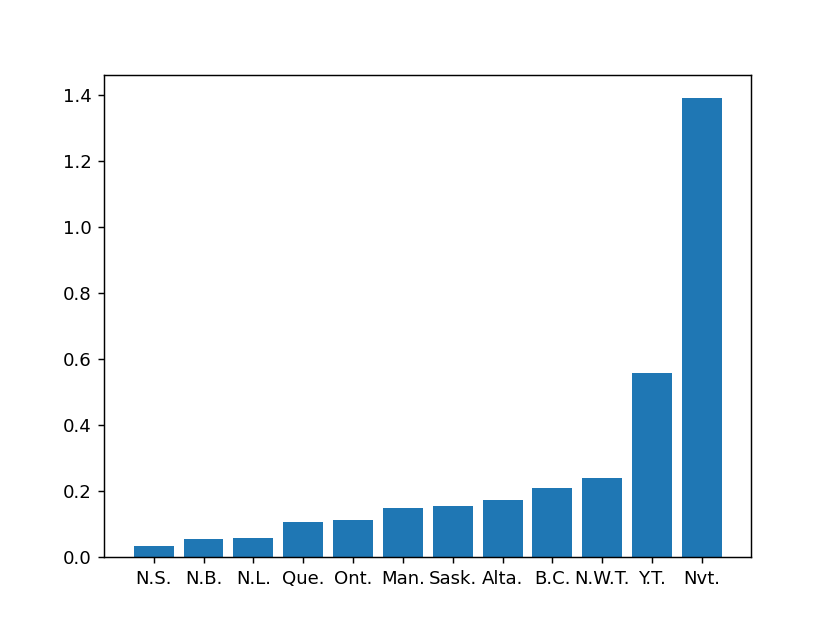

<BarContainer object of 13 artists>

In [120]:
Temp['Rate'] = Temp['date']/Temp['Total']*1e4
Temp = Temp.sort_values(by='Rate')
plt.figure()
plt.bar(Temp.index,Temp['Rate'])

<IPython.core.display.Javascript object>


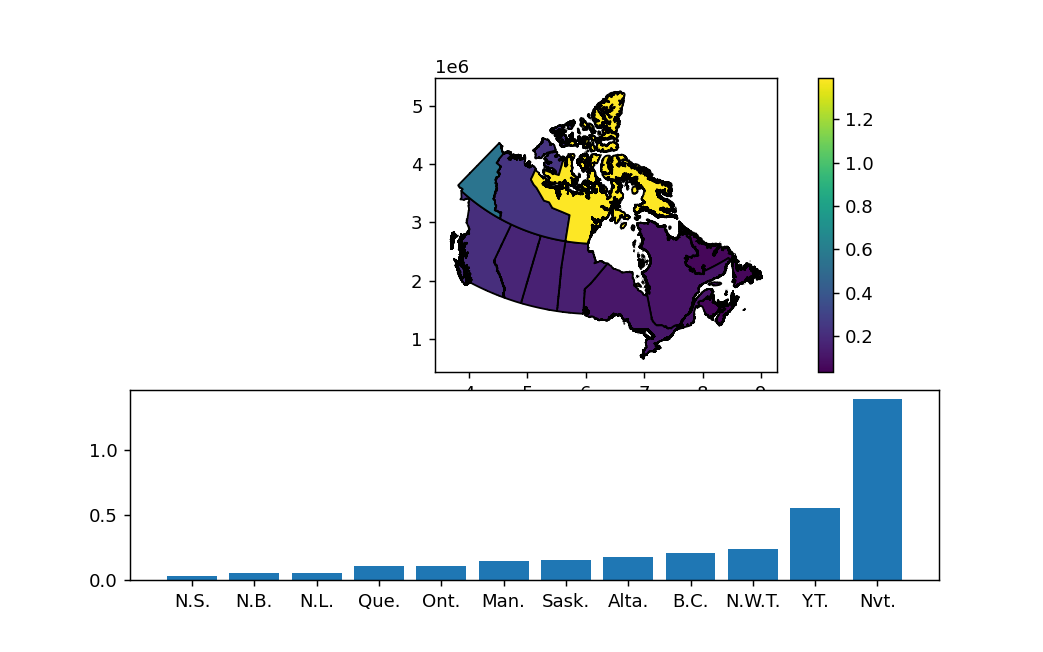

<BarContainer object of 13 artists>

In [145]:
fig = plt.figure(figsize=(8,5))

gs = fig.add_gridspec(5,2)
ax1 = fig.add_subplot(gs[0:3, :])

Temp.plot(ax=ax1,column='Rate',edgecolor='k',legend=True)
# BC_Killings.plot(ax=ax,column='race',legend=True)
ax3 = fig.add_subplot(gs[3:, :])
ax3.bar(Temp.index,Temp['Rate'])

# plt.subplot(2, 2, 4)
# plt.plot(x, np.sin(x)*np.cos(x))